# Regression-EmissionsHighGranularity Metrics

PyCaret’s Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the ‘outcome variable’, or ‘target’) and one or more independent variables (often called ‘features’, ‘predictors’, or ‘covariates’). 

The objective of regression is to:
- Develop a predictive model that estimates total operational emissions (MtCO2e) or total emissions (MtCO2e) based on production volume, commodity type, and other emissions factors.
- Determine how different factors like production value, commodity type (Sub-Bituminous vs. Metallurgical Coal, Natural Gas, Oil &  NGL), and specific emission sources (venting, flaring, fugitive methane, own fuel use, etc.) impact total emissions.
- Forecast future emissions trends based on historical production and emission patterns.

## Import necessary libraries

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.regression import RegressionExperiment
from pycaret.regression import setup, create_model, tune_model, plot_model

## Setup

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two required parameters: data and target. All the other parameters are optional.

In [38]:
# load sample dataset
from pycaret.datasets import get_data
df=pd.read_csv('emissions_high_granularity.csv')
df.head()

,year,parent_entity,parent_type,reporting_entity,commodity,production_value,production_unit,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e,emissions_category
0,1854,Adaro Energy,Investor-owned Company,Adaro Energy,Sub-Bituminous Coal,50.9000,Million tonnes/yr,92.3401,0.0,0.0,0.0,10.4316,0.3726,10.4316,102.7717,High
1,1855,Adaro Energy,Investor-owned Company,Adaro Energy,Metallurgical Coal,0.9000,Million tonnes/yr,2.3989,0.0,0.0,0.0,0.2710,0.0097,0.2710,2.6700,Low
2,1856,Adaro Energy,Investor-owned Company,Adaro Energy,Sub-Bituminous Coal,48.2300,Million tonnes/yr,87.4963,0.0,0.0,0.0,9.8844,0.3530,9.8844,97.3807,High
3,1857,Adaro Energy,Investor-owned Company,Adaro Energy,Metallurgical Coal,5.7700,Million tonnes/yr,15.3799,0.0,0.0,0.0,1.7375,0.0621,1.7375,17.1174,Low
4,1858,Adaro Energy,Investor-owned Company,Adaro Energy,Sub-Bituminous Coal,52.8073,Million tonnes/yr,95.8002,0.0,0.0,0.0,10.8225,0.3865,10.8225,106.6227,High


In [39]:
df.shape

(169, 16)

In [40]:
df.columns

Index(['year', 'parent_entity', 'parent_type', 'reporting_entity', 'commodity',
       'production_value', 'production_unit', 'product_emissions_MtCO2',
       'flaring_emissions_MtCO2', 'venting_emissions_MtCO2',
       'own_fuel_use_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e',
       'fugitive_methane_emissions_MtCH4',
       'total_operational_emissions_MtCO2e', 'total_emissions_MtCO2e',
       'emissions_category'],
      dtype='object')

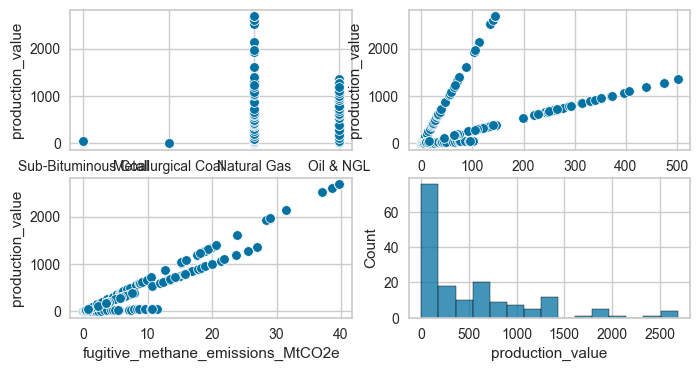

In [41]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(8,4))
sns.scatterplot(data=df, x='commodity', y='production_value', ax=axes[0,0])
sns.scatterplot(data=df, x='product_emissions_MtCO2', y='production_value', ax=axes[0,1])
sns.scatterplot(data=df, x='fugitive_methane_emissions_MtCO2e', y='production_value', ax=axes[1,0])
sns.histplot(df['production_value'],  bins = 15, ax=axes[1,1])

plt.show()

## OOP API

In [42]:
# Initialize PyCaret experiment
s = RegressionExperiment()
s.setup(df, target = 'production_value', session_id = 42)


,Description,Value
0,Session id,42
1,Target,production_value
2,Target type,Regression
3,Original data shape,"(169, 16)"
4,Transformed data shape,"(169, 27)"
5,Transformed train set shape,"(118, 27)"
6,Transformed test set shape,"(51, 27)"
7,Numeric features,9
8,Categorical features,6
9,Preprocess,True


## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [43]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.1132,0.0980,0.2339,1.0000,0.0432,0.0904,1.9250
br,Bayesian Ridge,0.0902,0.1000,0.2142,1.0000,0.0422,0.0927,0.0870
lasso,Lasso Regression,2.8883,18.6493,4.1486,0.9999,0.2269,0.3202,0.1100
ridge,Ridge Regression,2.7393,15.3978,3.8392,0.9999,0.2722,0.3933,0.1080
llar,Lasso Least Angle Regression,1.8860,7.9757,2.7183,0.9999,0.1469,0.2080,0.1510
et,Extra Trees Regressor,4.1085,95.5768,7.6121,0.9995,0.0998,0.1005,0.2200
catboost,CatBoost Regressor,10.0701,363.9327,16.0973,0.9985,0.2336,0.4537,2.5100
gbr,Gradient Boosting Regressor,12.5069,877.4653,22.1745,0.9973,0.1344,0.1488,0.1480
rf,Random Forest Regressor,16.3538,1346.9018,29.2344,0.9965,0.1686,0.2576,0.2720
dt,Decision Tree Regressor,17.9443,1206.0120,30.6297,0.9941,0.1767,0.1674,0.1030


In [44]:
print(best)

LinearRegression(n_jobs=-1)


## Analyze Model


This function analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [9]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Create Model

In [45]:
lr_mdl = s.create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0611,0.0088,0.0937,1.0000,0.0027,0.0014
1,0.0715,0.0076,0.0869,1.0000,0.0048,0.0031
2,0.0618,0.0059,0.0766,1.0000,0.0036,0.0024
3,0.0426,0.0026,0.0505,1.0000,0.0033,0.0014
4,0.2909,0.4184,0.6468,1.0000,0.0886,0.0480
5,0.0949,0.0579,0.2406,1.0000,0.0378,0.0149
6,0.0976,0.0141,0.1188,1.0000,0.0015,0.0008
7,0.1759,0.2751,0.5245,1.0000,0.2177,0.6871
8,0.1753,0.1852,0.4303,1.0000,0.0686,0.1430


In [46]:
print(lr_mdl)

LinearRegression(n_jobs=-1)


In [12]:
# or
s.evaluate_model(lr_mdl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
s.y_transformed.value_counts()

production_value
1277.500000    4
2689.430420    3
29.860701      2
97.323601      2
1382.864746    1
              ..
789.099976     1
47.200001      1
10.900000      1
97.765999      1
712.681396     1
Name: count, Length: 162, dtype: int64

## Tune best model( lr)

In [47]:
tuned_lr_mdl = s.tune_model(lr_mdl)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0611,0.0088,0.0937,1.0000,0.0027,0.0014
1,0.0715,0.0076,0.0869,1.0000,0.0048,0.0031
2,0.0618,0.0059,0.0766,1.0000,0.0036,0.0024
3,0.0426,0.0026,0.0505,1.0000,0.0033,0.0014
4,0.2909,0.4184,0.6468,1.0000,0.0886,0.0480
5,0.0949,0.0579,0.2406,1.0000,0.0378,0.0149
6,0.0976,0.0141,0.1188,1.0000,0.0015,0.0008
7,0.1759,0.2751,0.5245,1.0000,0.2177,0.6871
8,0.1753,0.1852,0.4303,1.0000,0.0686,0.1430


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [48]:
print(tuned_lr_mdl)

LinearRegression(n_jobs=-1)


## Predictions

This function predicts prediction_label using the trained model. When data is None, it predicts label and score on the test set (created during the setup function).

In [49]:
pred= s.predict_model(tuned_lr_mdl)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0564,0.0061,0.0780,1.0000,0.0199,0.0106


The evaluation metrics are calculated on the test set. The second output is the pd.DataFrame with predictions on the test set (see the last two columns). To generate labels on the unseen (new) dataset, simply pass the dataset in the predict_model function.

In [50]:
predictions = s.predict_model(tuned_lr_mdl)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0564,0.0061,0.0780,1.0000,0.0199,0.0106


,year,parent_entity,parent_type,reporting_entity,commodity,production_unit,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e,emissions_category,production_value,prediction_label
138,1992,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi National Oil Company,Oil & NGL,Million bbl/yr,249.710800,3.9815,0.9570,0.0,13.4490,0.4803,18.387600,268.098389,High,672.299988,672.352568
30,1884,Adaro Energy,Investor-owned Company,Adaro Energy,Sub-Bituminous Coal,Million tonnes/yr,2.539800,0.0000,0.0000,0.0,0.2869,0.0102,0.286900,2.826700,Low,1.400000,1.511887
119,1973,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,Million bbl/yr,43.721699,0.6971,0.1676,0.0,2.3548,0.0841,3.219500,46.941101,Low,117.712502,117.573831
29,1883,Adaro Energy,Investor-owned Company,Adaro Energy,Sub-Bituminous Coal,Million tonnes/yr,1.814100,0.0000,0.0000,0.0,0.2049,0.0073,0.204900,2.019100,Low,1.000000,1.214529
143,1997,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi National Oil Company,Oil & NGL,Million bbl/yr,263.007904,4.1936,1.0080,0.0,14.1652,0.5059,19.366699,282.374603,High,708.099976,708.068473


## Using plot_model function to generate plots individually.


In [51]:
pd.DataFrame(s._available_plots, index=['plots']).T

,plots
pipeline,Pipeline Plot
parameter,Hyperparameters
residuals,Residuals
error,Prediction Error
cooks,Cooks Distance
rfe,Feature Selection
learning,Learning Curve
manifold,Manifold Learning
vc,Validation Curve
feature,Feature Importance


In [52]:
available_params = s.plot_model(tuned_lr_mdl, plot = 'parameter')
print(available_params)

,Parameters
copy_X,True
fit_intercept,True
n_jobs,-1
positive,False


None


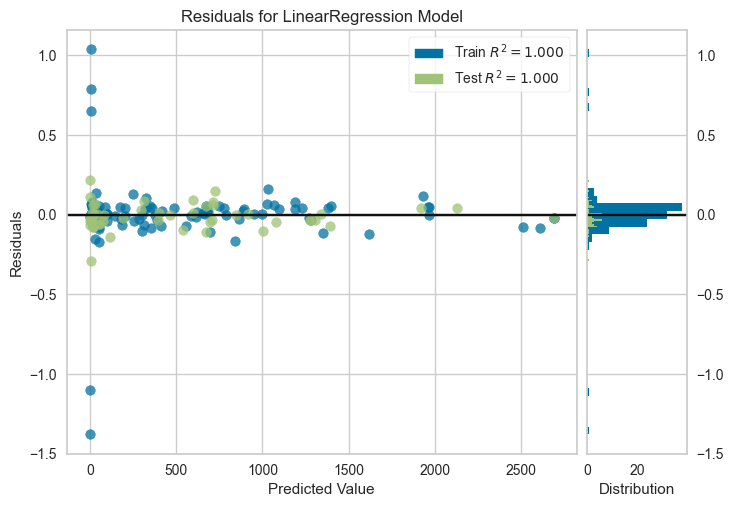

In [53]:
s.plot_model(tuned_lr_mdl, plot = 'residuals')


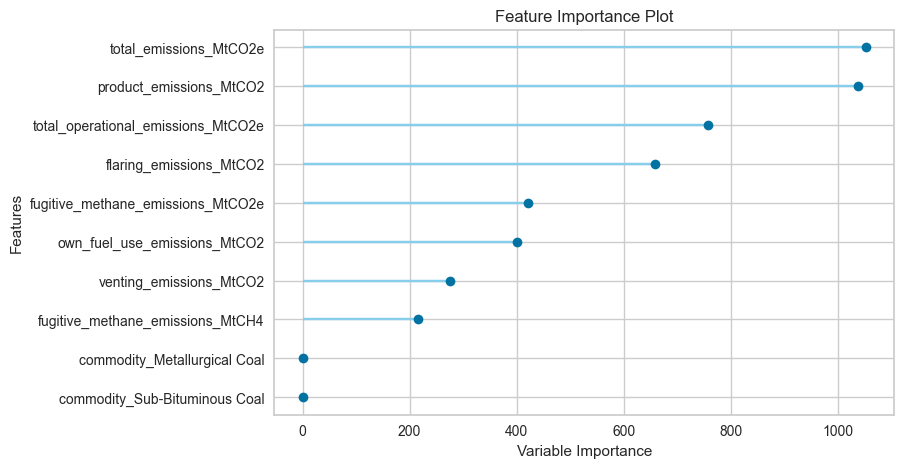

In [54]:
s.plot_model(tuned_lr_mdl, plot = 'feature')

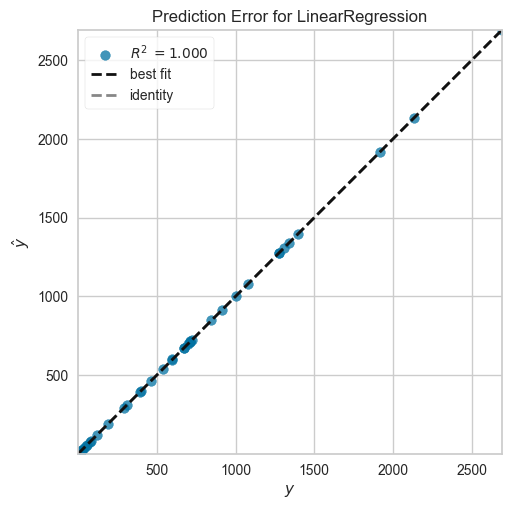

In [55]:
s.plot_model(tuned_lr_mdl, plot = 'error')

## Metrices

In [56]:
# All available metrics
list(s._all_metrics.keys())

['mae', 'mse', 'rmse', 'r2', 'rmsle', 'mape']

In [57]:
# pd.DataFrame(s._all_models, index=['stuff']).T
list(s._all_models.keys())

['lr',
 'lasso',
 'ridge',
 'en',
 'lar',
 'llar',
 'omp',
 'br',
 'ard',
 'par',
 'ransac',
 'tr',
 'huber',
 'kr',
 'svm',
 'knn',
 'dt',
 'rf',
 'et',
 'ada',
 'gbr',
 'mlp',
 'lightgbm',
 'catboost',
 'dummy']

In [58]:
df[['production_value']].describe()

,production_value
count,169.000000
mean,517.610641
std,638.228700
min,0.220000
25%,26.780000
50%,294.182700
75%,779.300000
max,2689.430300


### Create scores (Metrics values)

In [59]:
scores = pd.DataFrame(
    s._calculate_metrics(y_test=pred['production_value'], 
                         pred=pred['prediction_label'], 
                         pred_prob='lr Regression'), 
    index=['scores']
)

In [60]:
scores

,MAE,MSE,RMSE,R2,RMSLE,MAPE
scores,0.056402,0.006091,0.078045,1.0,0.019896,0.01061


In [61]:
print(f"R2: {scores.loc['scores','R2']}")

R2: 0.9999999839755294


## Save the model


In [62]:
s.save_model(tuned_lr_mdl, 'my_best_pipeline_Emission')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['year', 'product_emissions_MtCO2',
                                              'flaring_emissions_MtCO2',
                                              'venting_emissions_MtCO2',
                                              'own_fuel_use_emissions_MtCO2',
                                              'fugitive_methane_emissions_MtCO2e',
                                              'fugitive_methane_emissions_MtCH4',
                                              'total_operational_emissions_MtCO2e',
                                              'total_emissions_MtCO2e'],
                                     transf...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': High    0
 Low     1
 NaN    -1
 dtype: int64}]))),
           

## To load the model back in the environment:

In [63]:
# loaded_model = s.load_model('my_best_pipeline')
# print(loaded_model)

## List of Available Plots(ID-Name)
-  '**pipeline**'-Pipeline Plot
-  '**parameter**'-Hyperparameters
-  '**residuals**'-	Residuals
-  '**error**'-	Prediction Error
-  '**cooks**'-	Cooks Distance
-  '**rfe**'-	Feature Selection
-  '**learning**'-	Learning Curve
-  '**manifold**'-	Manifold Learning
-  '**vc**'-	Validation Curve
-  '**feature**'-	Feature Importance
-  '**feature_all**'-	Feature Importance (All)
-  '**tree**'-	Decision Tree
-  '**residuals_interactive**'-	Interactive Residuals


### Derived Models

In [64]:
print(lr_mdl)

LinearRegression(n_jobs=-1)


In [65]:
print(tuned_lr_mdl)

LinearRegression(n_jobs=-1)
